# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [4]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [5]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

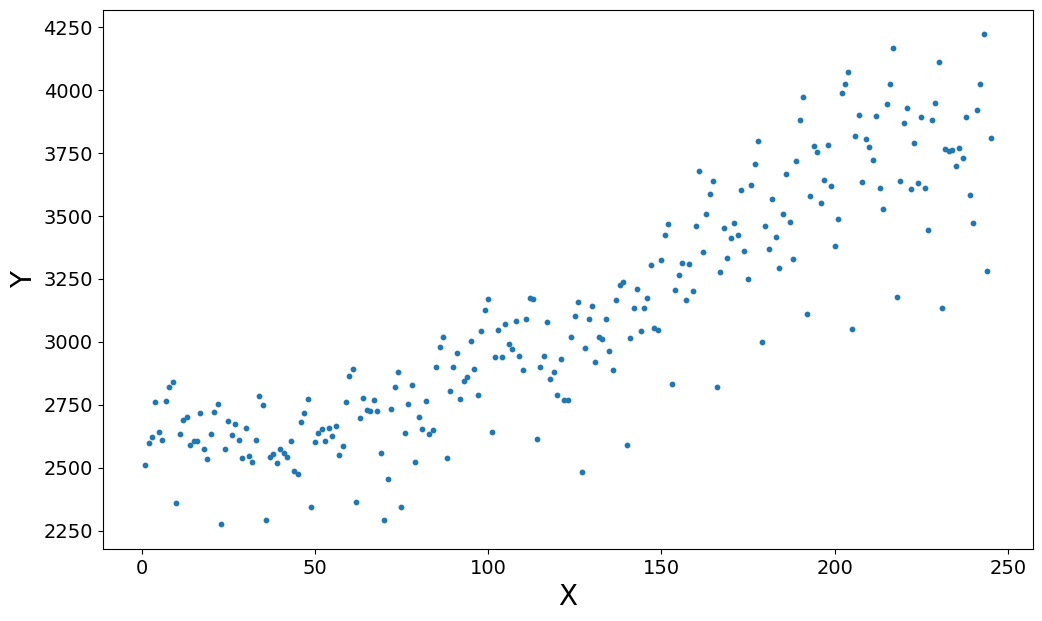

In [6]:
#Your code for scatterplot here
import matplotlib.pyplot as plt


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(xvals, yvals, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Exercise-3-1.pdf', bbox_inches = 'tight')
plt.show()


## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

beta_0 is:  2367.381766477082
beta_1 is:  5.938990118238425
MSE is:  45323.635921224486
R_2 is;  0.7956113333573026


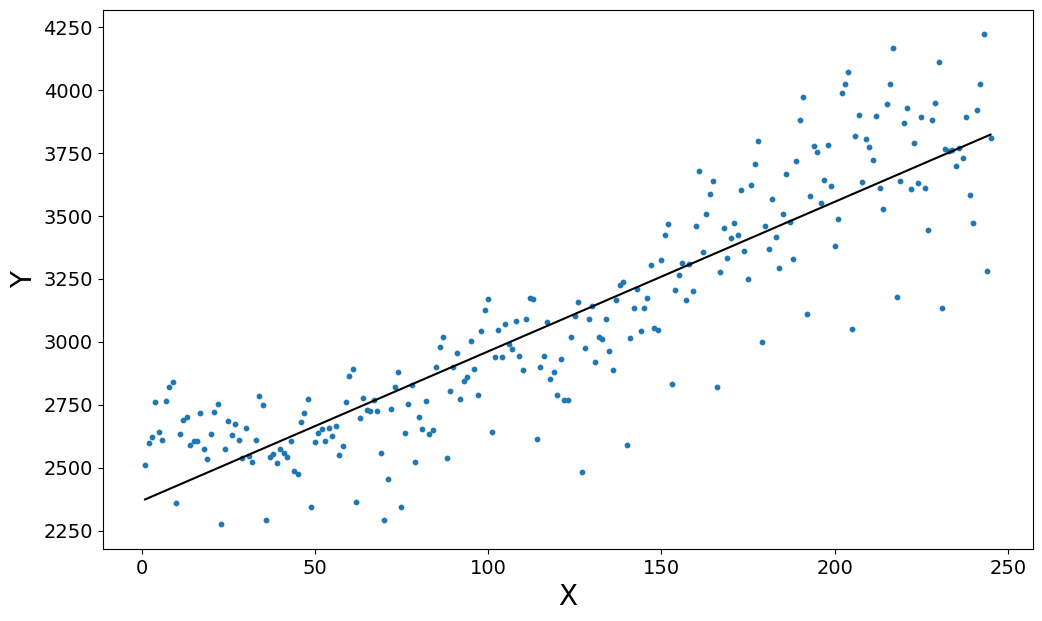

In [7]:
#Your code here

#x now is just x
#y now is log10 y
x = xvals
y = yvals

#fit the curve
all_ones = np.ones(np.shape(x))
X = np.column_stack((all_ones,x))
beta = np.linalg.lstsq(X, y, rcond=None)[0] 
print("beta_0 is: ",beta[0])
print("beta_1 is: ",beta[1])
c_1 = beta[0]
c_2 = beta[1]

#calculate MSE and R_2
fit_1 = X.dot(beta)
fit_0 = np.mean(yvals)*all_ones 
residuals_1 = yvals - fit_1
residuals_0 = yvals - fit_0
SSE_1 = np.round(np.linalg.norm(residuals_1)**2,decimals = 4)
SSE_0 = np.round(np.linalg.norm(residuals_0)**2,decimals = 4)
MSE_1 = SSE_1/x.shape[0]
R_2 = 1 - SSE_1/SSE_0
print("MSE is: ",MSE_1)
print("R_2 is; ",R_2)

#graph
plt.scatter(xvals, yvals, s=10)   # s can be used to adjust the size of the dots
plt.plot(xvals, X.dot(beta), color = 'black', label = 'k=2')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Exercise-3-2.pdf', bbox_inches = 'tight')
plt.show()

## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

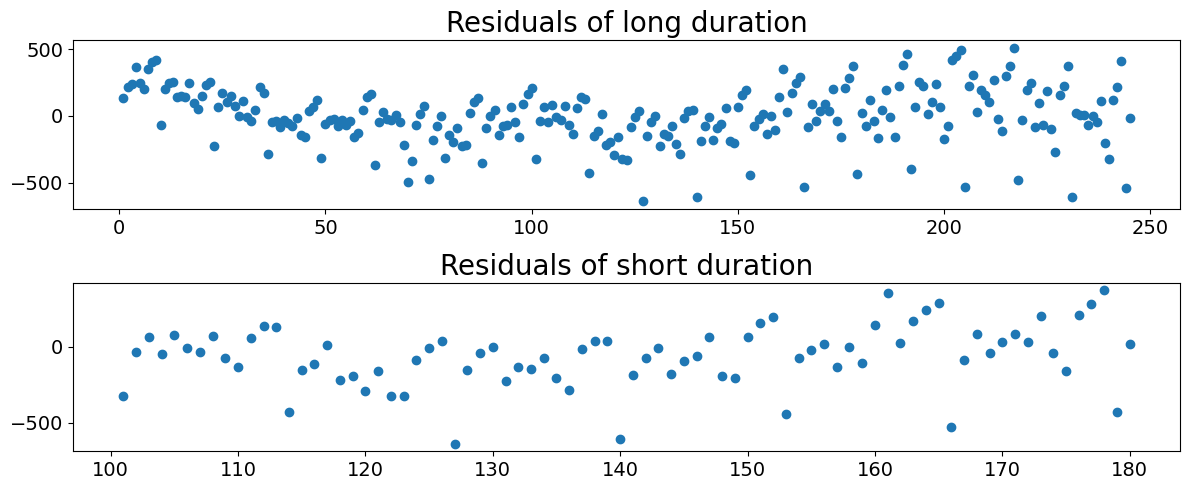

In [9]:
#Your code here
plt.rcParams['figure.figsize'] = [12, 5]
plt.subplot(211)
plt.scatter(xvals, residuals_1)
plt.title('Residuals of long duration')
plt.subplot(212)
plt.scatter(xvals[100:180], residuals_1[100:180])
plt.title('Residuals of short duration')
plt.tight_layout()
plt.savefig('Exercise-3-3.pdf', bbox_inches = 'tight')


Theoretically, there should be a periodic pattern because this is part of exercise. And, I did see something similar to a periodic pattern though it is not very obvious.

### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


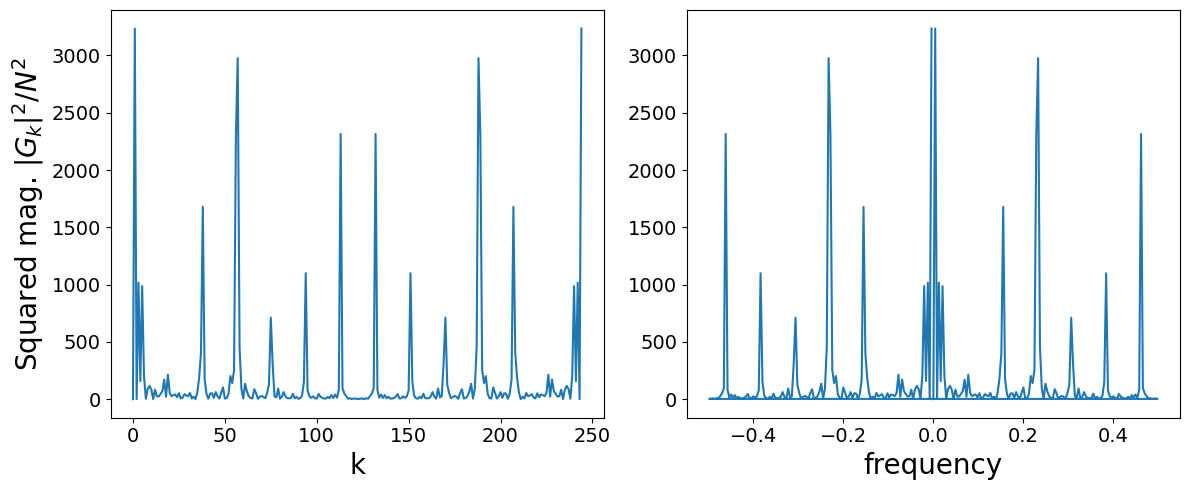

In [13]:
# Your code to compute and plot the periodogram
N = np.size(xvals)
T = xvals[1] - xvals[0]  # This can be the time interval between any two successive values.

# Compute the squared magnitudes of the DFT coefficients -- this is known as the "periodogram"
pgram = np.abs(np.fft.fft(residuals_1, N)/N)**2 #We normalize by N, but this is optional
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = np.fft.fftfreq(N)/T
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency') 
plt.savefig('Exercise-3-4.pdf', bbox_inches = 'tight')
plt.tight_layout()



In [ ]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
top_inds = indices[(pgram > 0.5*np.max(pgram))]
top_freqs_hz = freqs_in_hz[(pgram > 0.5*np.max(pgram))]
print('Top indices:', top_inds, ' Top frequencies in Hz:', top_freqs_hz)


Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.]  Top frequencies in Hz: [ 0.00408163  0.15510204  0.22857143  0.23265306  0.46122449 -0.46122449
 -0.23265306 -0.22857143 -0.15510204 -0.00408163]
5


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 

All numerical outputs should be displayed to three decimal places.

For w is:  0.026    The coefficients beta_s, beta_c are: [-51.253 101.556]
For w is:  0.975    The coefficients beta_s, beta_c are: [ 61.628 -54.006]
For w is:  1.436    The coefficients beta_s, beta_c are: [-15.581 -94.797]
For w is:  1.462    The coefficients beta_s, beta_c are: [81.659 72.381]
For w is:  2.898    The coefficients beta_s, beta_c are: [32.472 90.589]


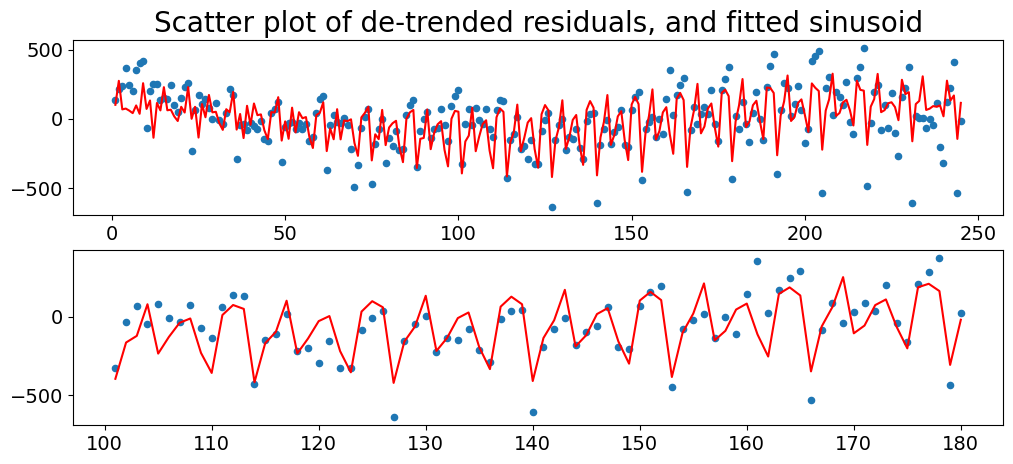

In [24]:
# Your code here
w = 2*math.pi*top_freqs_hz[0]  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)
# Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
XT = np.vstack((np.sin(w*xvals), np.cos(w*xvals)))
for i in range(1,int(len(top_freqs_hz)/2)):
    w = 2*math.pi*top_freqs_hz[i]  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)
    # Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
    XT = np.vstack((XT,np.sin(w*xvals), np.cos(w*xvals)))
X = np.transpose(XT)


beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(residuals_1) # Calculating the least-squares coefficients
print("For w is: ",np.round(2*math.pi*top_freqs_hz[0], decimals = 3),'   The coefficients beta_s, beta_c are:', np.round(beta_sc[0:2], decimals = 3))
print("For w is: ",np.round(2*math.pi*top_freqs_hz[1], decimals = 3),'   The coefficients beta_s, beta_c are:', np.round(beta_sc[2:4], decimals = 3))
print("For w is: ",np.round(2*math.pi*top_freqs_hz[2], decimals = 3),'   The coefficients beta_s, beta_c are:', np.round(beta_sc[4:6], decimals = 3))
print("For w is: ",np.round(2*math.pi*top_freqs_hz[3], decimals = 3),'   The coefficients beta_s, beta_c are:', np.round(beta_sc[6:8], decimals = 3))
print("For w is: ",np.round(2*math.pi*top_freqs_hz[4], decimals = 3),'   The coefficients beta_s, beta_c are:', np.round(beta_sc[8:10], decimals = 3))
fit_sc = X.dot(beta_sc)

plt.subplot(211)
plt.scatter(xvals, residuals_1, s=20)
plt.plot(xvals, fit_sc, 'r')
plt.title('Scatter plot of de-trended residuals, and fitted sinusoid')
# Zoom in to a few values
plt.subplot(212)
plt.scatter(xvals[100:180], residuals_1[100:180], s=20)
plt.plot(xvals[100:180], fit_sc[100:180], 'r')
plt.savefig('Exercise-3-5.pdf', bbox_inches = 'tight')
plt.show()


### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

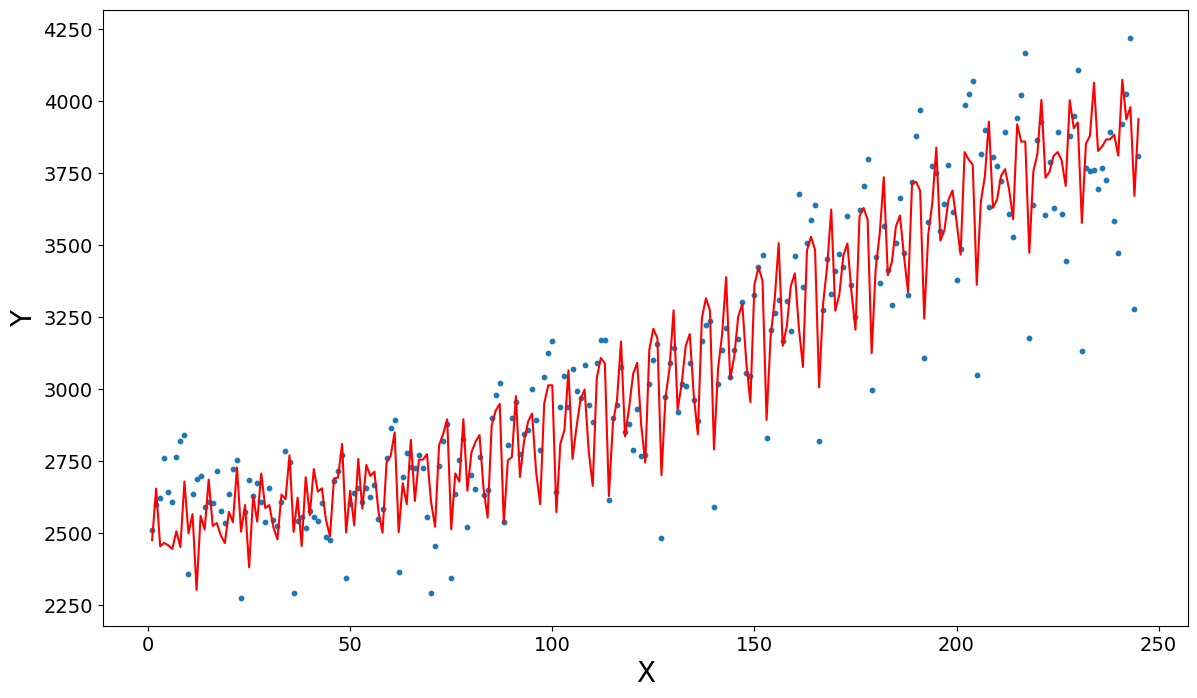

SSE is:  4972887.791
MSE is:  20297.501
R_2 is:  0.908


In [28]:
# Your code here
fit_combined = fit_1 + fit_sc
#resid_comb = yvalues - fit_combined # This will is the same as resid_final computed above

plt.rcParams['figure.figsize'] = [14, 8]


plt.scatter(xvals, yvals, s=10)
plt.plot(xvals, fit_combined, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Exercise-3-6.pdf', bbox_inches = 'tight')
plt.show()

resid_final = residuals_1 - fit_sc
SSE_final = np.linalg.norm(resid_final)**2
MSE_final = SSE_final/np.size(yvals)
print('SSE is: ', np.round(SSE_final,3))
print('MSE is: ', np.round(MSE_final,3))

SSE_0 = np.linalg.norm(yvals - np.mean(yvals))**2
R2_combined = 1 - SSE_final/SSE_0
print('R_2 is: ', np.round(R2_combined, 3))

Without adding periodic terms, MSE is about 45323
                               R_2 is about 0.8

After adding periodic terms, MSE is about 20298
                             R_2 is about 0.9

As a result, by adding periodic terms, the fitted curve is better because MSE is reduced and R_2 is increases.